<a href="https://colab.research.google.com/github/parth57/Self_Drive/blob/master/Object_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from PIL import Image
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D,GlobalAveragePooling2D,Dropout,Activation
from keras.optimizers import SGD
from keras.utils.np_utils import to_categorical


In [55]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

In [56]:
print('Training Images: {}'.format(X_train.shape))
print('Testing Image: {}'.format(X_test.shape))

Training Images: (50000, 32, 32, 3)
Testing Image: (10000, 32, 32, 3)


In [57]:
print(X_train[0].shape)

(32, 32, 3)


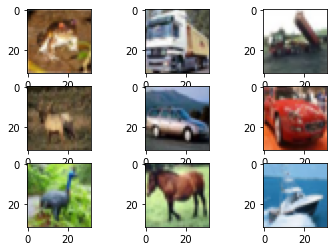

In [58]:
for i in range(9):
  plt.subplot(3,3,i+1)
  img=X_train[i]
  plt.imshow(img)
  
plt.show()


In [59]:
seed=5
np.random.seed(seed)
(X_train,y_train),(X_test,y_test)=cifar10.load_data()
X_train=X_train/255
X_test=X_test/255

In [60]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [61]:
num_classes=y_test.shape[1]
print(y_train.shape)
print(y_train[0])

(50000, 10)
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [62]:

def allcnn(weights=None):
    # define model type - Sequential
    model = Sequential()

    # add model layers - Convolution2D, Activation, Dropout
    model.add(Conv2D(96, (3, 3), padding = 'same', input_shape=(32, 32,3)))
    model.add(Activation('relu'))
    model.add(Conv2D(96, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(96, (3, 3), padding = 'same', strides = (2,2)))
    model.add(Dropout(0.5))

    model.add(Conv2D(192, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (3, 3), padding = 'same', strides = (2,2)))
    model.add(Dropout(0.5))

    model.add(Conv2D(192, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (1, 1), padding = 'valid'))
    model.add(Activation('relu'))
    model.add(Conv2D(10, (1, 1), padding = 'valid'))

    # add GlobalAveragePooling2D layer with Softmax activation
    model.add(GlobalAveragePooling2D())
    model.add(Activation('softmax'))
    
    # load the weights
    if weights:
        model.load_weights(weights)
    
    # return model
    return model


In [63]:
learning_rate = 0.01
weight_decay = 1e-6
momentum = 0.9

# build model 
model = allcnn()

# define optimizer and compile model
sgd = SGD(lr=learning_rate, decay=weight_decay, momentum=momentum, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# print model summary
print (model.summary())


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 32, 32, 96)        2688      
_________________________________________________________________
activation_14 (Activation)   (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 32, 32, 96)        83040     
_________________________________________________________________
activation_15 (Activation)   (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 16, 16, 96)        83040     
_________________________________________________________________
dropout_10 (Dropout)         (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 16, 16, 192)      

Note:-The epochs should have been around 500 and batch size should have been like 100,so that our model could perform better.But for the sake of time we are taking epochs and batch_size to be following.As the model will take time to train itself.

In [64]:
 epochs=50
 batch_size=500
 h=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=epochs,batch_size=batch_size,verbose=1,shuffle=True)

Epoch 1/50
100/100 [==============================] - 21s 205ms/step - loss: 2.3017 - accuracy: 0.1029 - val_loss: 2.2979 - val_accuracy: 0.1335
Epoch 2/50
100/100 [==============================] - 21s 214ms/step - loss: 2.2437 - accuracy: 0.1433 - val_loss: 2.0968 - val_accuracy: 0.2092
Epoch 3/50
100/100 [==============================] - 21s 208ms/step - loss: 2.0805 - accuracy: 0.2162 - val_loss: 2.0176 - val_accuracy: 0.2405
Epoch 4/50
100/100 [==============================] - 20s 203ms/step - loss: 1.9984 - accuracy: 0.2644 - val_loss: 1.9313 - val_accuracy: 0.2781
Epoch 5/50
100/100 [==============================] - 20s 204ms/step - loss: 1.9032 - accuracy: 0.3052 - val_loss: 1.8316 - val_accuracy: 0.3248
Epoch 6/50
100/100 [==============================] - 21s 207ms/step - loss: 1.8320 - accuracy: 0.3283 - val_loss: 1.9560 - val_accuracy: 0.3027
Epoch 7/50
100/100 [==============================] - 21s 206ms/step - loss: 1.7611 - accuracy: 0.3529 - val_loss: 1.6782 - val_ac

Text(0.5, 1.0, 'Training Data')

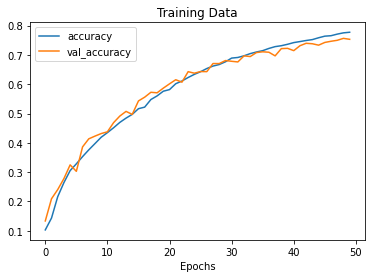

In [66]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])
plt.xlabel('Epochs')
plt.title('Training Data')

Text(0.5, 1.0, 'Training Data')

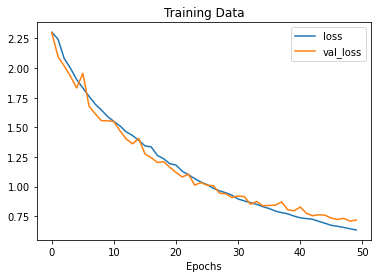

In [67]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.xlabel('Epochs')
plt.title('Training Data')

Note:- We need to adjust our hyper parameters like I have written above during training.That's why  val_loss,loss,val_accuracy and accuracy are compromised

In [65]:
score=model.evaluate(X_test,y_test,verbose=1)
print('Accuracy:',score[1])

313/313 [==============================] - 2s 5ms/step - loss: 0.7186 - accuracy: 0.7531
Accuracy: 0.7530999779701233


In [68]:
classes = range(0,10)

names = ['airplane',
        'automobile',
        'bird',
        'cat',
        'deer',
        'dog',
        'frog',
        'horse',
        'ship',
        'truck']


In [69]:
class_labels=dict(zip(classes,names))
print(class_labels)

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


In [84]:
batch=X_test[50:59]
labels=np.argmax(y_test[50:59],axis=-1)
predictions=model.predict(batch,verbose=1)

1/1 [==============================] - 0s 5ms/step


In [85]:
print(predictions)

[[3.42137093e-04 2.15534028e-03 1.69167717e-04 2.09007630e-04
  1.48470663e-05 3.77996071e-06 1.79119033e-05 3.87801032e-04
  1.41564931e-04 9.96558368e-01]
 [4.97639971e-03 3.64412757e-04 2.42903945e-03 1.55173315e-04
  4.37659735e-04 1.32330842e-05 1.23590259e-02 9.55406285e-05
  9.78854537e-01 3.14905308e-04]
 [3.14034522e-02 2.99421168e-04 3.04064840e-01 4.69846278e-03
  4.17883992e-02 6.20575398e-02 1.82658210e-01 3.32324922e-01
  2.79021263e-03 3.79145108e-02]
 [5.58126310e-04 2.50216341e-03 2.83130948e-02 4.50501531e-01
  1.19252548e-01 2.92312324e-01 6.39617220e-02 3.14239487e-02
  8.07655742e-04 1.03669800e-02]
 [1.78089715e-03 2.67517345e-04 9.41853250e-06 5.04647595e-08
  7.21711544e-08 4.20760280e-08 8.28412823e-08 1.18500836e-08
  9.97915447e-01 2.64347364e-05]
 [6.48777874e-04 4.04354705e-06 3.85856343e-04 8.86669295e-05
  6.80962330e-06 4.04455750e-06 1.37942095e-06 1.52528386e-07
  9.98841107e-01 1.91500567e-05]
 [5.66278832e-05 2.96836788e-06 6.82349084e-03 6.56912625e

In [86]:
for image in predictions:
  print(np.sum(image))

0.99999994
0.99999994
1.0
1.0000001
1.0
1.0
1.0
1.0
1.0000001


In [87]:
class_results=np.argmax(predictions,axis=-1)
print(class_results)

[9 8 7 3 8 8 7 3 3]


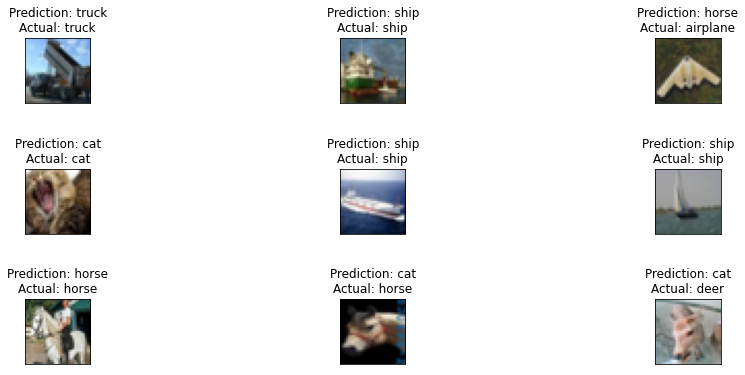

In [91]:
fig, axs = plt.subplots(3, 3, figsize = (16, 6))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten()

for i, img in enumerate(batch):

    # determine label for each prediction, set title
    for key, value in class_labels.items():
        if class_results[i] == key:
            title = 'Prediction: {}\nActual: {}'.format(class_labels[key], class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)
            
    # plot the image
    axs[i].imshow(img)
    
# show the plot
plt.show()


Note:-Since we compromised during our training ,so we are not able to predict some of our images accurately.But if we adjust the hyperparameters like epochs and batch_size we could have gotten accurate results.